In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numberline import *
import voting_rules as rules

In [2]:
from utility import get_continuous_weights, loss

In [3]:
min_val = 0
max_val = 10
size = 4

true_pref = (max_val - min_val) / 2 + min_val
vals = np.random.uniform(low=min_val, high=max_val, size=size)
print(vals)

[9.47076923 4.40458826 3.09595968 7.42904019]


In [4]:
unweighted_result_mean = rules.mean(vals)
unweighted_loss_mean = loss(unweighted_result_mean, true_pref)

weighted_vals = get_continuous_weights(vals, min_val, max_val)
weighted_result_mean = rules.weighted_mean(weighted_vals)
weighted_loss_mean = loss(weighted_result_mean, true_pref)

print("MEAN")
print(f"True preference: {true_pref}")
print(f"Unweighted result: {unweighted_result_mean}")
print(f"\tLoss: {unweighted_loss_mean}")
print(f"Weighted result: {weighted_result_mean}")
print(f"\tLoss: {weighted_loss_mean}")
print(f"Better result: {'UNWEIGHTED' if unweighted_loss_mean <= weighted_loss_mean else 'WEIGHTED'}")
print(f"\tDifference: {abs(unweighted_loss_mean - weighted_loss_mean)}")

MEAN
True preference: 5.0
Unweighted result: 6.100089340674344
	Loss: 1.2101965574653137
Weighted result: 5.465244057428443
	Loss: 0.21645203297248006
Better result: WEIGHTED
	Difference: 0.9937445244928337


In [5]:
unweighted_result_median = rules.median(vals)
unweighted_loss_median = loss(unweighted_result_median, true_pref)

weighted_vals = get_continuous_weights(vals, min_val, max_val)
weighted_result_median = rules.weighted_median(weighted_vals)
weighted_loss_median = loss(weighted_result_median, true_pref)

print("MEDIAN")
print(f"True preference: {true_pref}")
print(f"Unweighted result: {unweighted_result_median}")
print(f"\tLoss: {unweighted_loss_median}")
print(f"Weighted result: {weighted_result_median}")
print(f"\tLoss: {weighted_loss_median}")
print(f"Better result: {'UNWEIGHTED' if unweighted_loss_median <= weighted_loss_median else 'WEIGHTED'}")
print(f"\tDifference: {abs(unweighted_loss_median - weighted_loss_median)}")

MEDIAN
True preference: 5.0
Unweighted result: 4.404588261590442
	Loss: 0.35451513823589176
Weighted result: 4.404588261590442
	Loss: 0.35451513823589176
Better result: UNWEIGHTED
	Difference: 0.0


True preference: green
Unweighted result: red
Weighted result: purple

Best weighted rule: MEAN
Best unweighted rule: MEDIAN


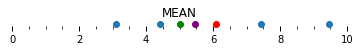

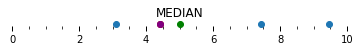

In [6]:
print(f"True preference: green")
print(f"Unweighted result: red")
print(f"Weighted result: purple")

print()
print(f"Best weighted rule: {'MEDIAN' if weighted_loss_median < weighted_loss_mean else 'TIE' if weighted_loss_median == weighted_loss_mean else 'MEAN'}")
print(f"Best unweighted rule: {'MEDIAN' if unweighted_loss_median < unweighted_loss_mean else 'TIE' if unweighted_loss_median == unweighted_loss_mean else 'MEAN'}")

ax = numberline(vals, min_val, max_val)
ax.scatter(true_pref, 0, clip_on=False, zorder=3, color='green')
ax.scatter(unweighted_result_mean, 0, clip_on=False, zorder=3, color='red')
ax.scatter(weighted_result_mean, 0, clip_on=False, zorder=3, color='purple')
plt.title("MEAN")

ax = numberline(vals, min_val, max_val)
ax.scatter(true_pref, 0, clip_on=False, zorder=3, color='green')
ax.scatter(unweighted_result_median, 0, clip_on=False, zorder=3, color='red')
ax.scatter(weighted_result_median, 0, clip_on=False, zorder=3, color='purple')
plt.title("MEDIAN");